In [1]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import csv

%matplotlib inline
mpl.rcParams['figure.dpi'] = 800
#mpl.rc('text', usetex=True)
plt.rcParams.update({'font.size': 7})
font_size = 10

In [2]:
case = "mesh_o3_i3"
fo_name = "./data/"+case+"/"

# Cylinder A 
df_a = pd.read_csv(fo_name + "surfaceFieldValue_a.dat", comment='#', index_col=0, delimiter=r"\s+", usecols=[0,1,2], names=['time', 'cd', 'cl'])
df_a['cd'] = df_a['cd'].str.replace('(', '', regex=True)

# Cylinder B
df_b = pd.read_csv(fo_name + "surfaceFieldValue_b.dat", comment='#', index_col=0, delimiter=r"\s+", usecols=[0,1,2], names=['time', 'cd', 'cl'])
df_b['cd'] = df_b['cd'].str.replace('(', '', regex=True)

# Cylinder C
df_c = pd.read_csv(fo_name + "surfaceFieldValue_c.dat", comment='#', index_col=0, delimiter=r"\s+", usecols=[0,1,2], names=['time', 'cd', 'cl'])
df_c['cd'] = df_c['cd'].str.replace('(', '', regex=True)

In [3]:
df_a["cl"] =  2.5 * df_a["cl"] 
df_b["cl"] =  2.5 * df_b["cl"] 
df_c["cl"] =  2.5 * df_c["cl"]

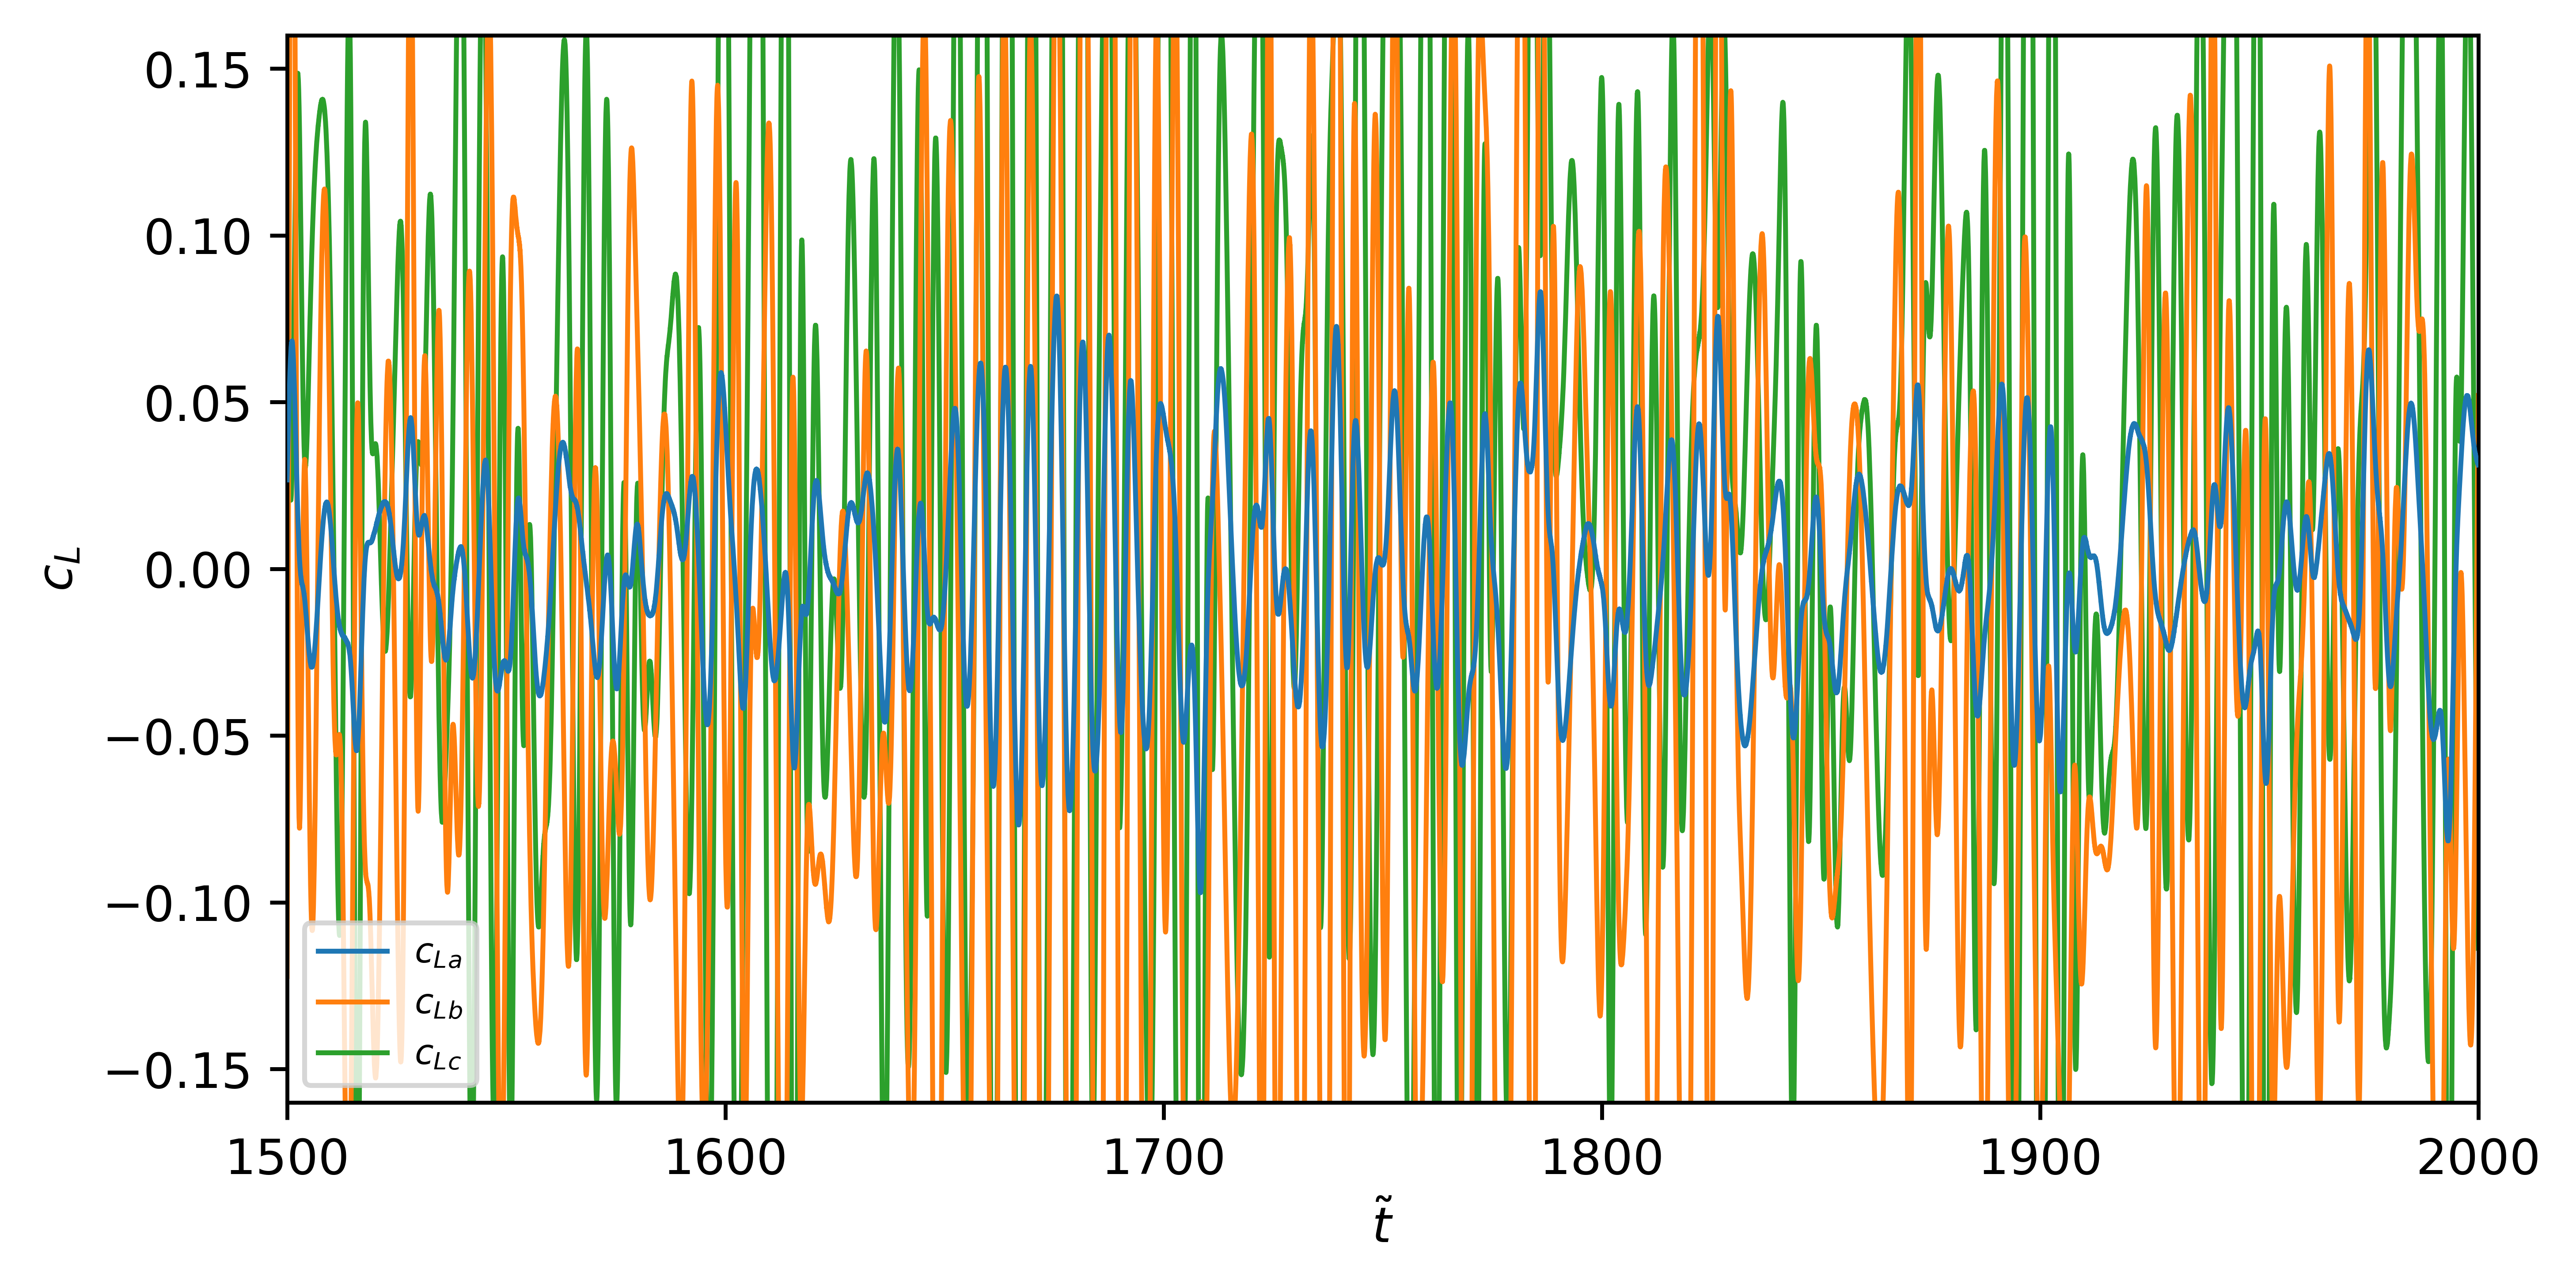

In [4]:
fig, ax1 = plt.subplots(1,1,figsize=(8,4))

ax1.set_ylabel(r"$c_L$", fontsize=font_size)
ax1.set_xlabel(r"$\tilde{t}$", fontsize=font_size)
ax1.tick_params(labelsize=font_size)
ax1.set_xlim((1500,2000))
ax1.set_ylim((-0.16,0.16))

# df['cl'].plot(label=cases[0])
df_a["cl"].plot(xlabel=r"$\tilde{t}$", ylabel=r"$c_L$", linewidth=1, label=r"${c_L}_a$", zorder=3)
df_b["cl"].plot(xlabel=r"$\tilde{t}$", ylabel=r"$c_L$", linewidth=1, label=r"${c_L}_b$", zorder=2)
df_c["cl"].plot(xlabel=r"$\tilde{t}$", ylabel=r"$c_L$", linewidth=1, label=r"${c_L}_c$", zorder=1)
ax1.legend()
fig.savefig(case+'_cl.png')

In [5]:
n= 75.00  # trimmig param (first n time step)

df = pd.read_csv(fo_name + "coefficient.dat", sep="\t", names=['time', 'cd', 'cl'], comment='#', usecols=[0,1,3])
timescale = df["time"]
idx = np.abs(timescale-n).argmin()
t = timescale[idx:-1]
trimmed_df_a = df_a.iloc[idx: , :]
trimmed_df_b = df_b.iloc[idx: , :]
trimmed_df_c = df_c.iloc[idx: , :]

In [6]:
temp = [[] for i in range(6)]

for i in range(len(trimmed_df_a["cl"])-1):
    i+=1
    a_mean = trimmed_df_a["cl"].head(i).mean()
    b_mean = trimmed_df_b["cl"].head(i).mean()
    c_mean = trimmed_df_c["cl"].head(i).mean()
    a_std = trimmed_df_a["cl"].head(i).std()
    b_std = trimmed_df_b["cl"].head(i).std()
    c_std = trimmed_df_c["cl"].head(i).std()
    temp[0].append(a_mean)
    temp[1].append(b_mean)
    temp[2].append(c_mean)
    temp[3].append(a_std)
    temp[4].append(b_std)
    temp[5].append(c_std)

temp = np.asarray(temp)
means = temp[0:3, :]
stds = temp[3:6, :]

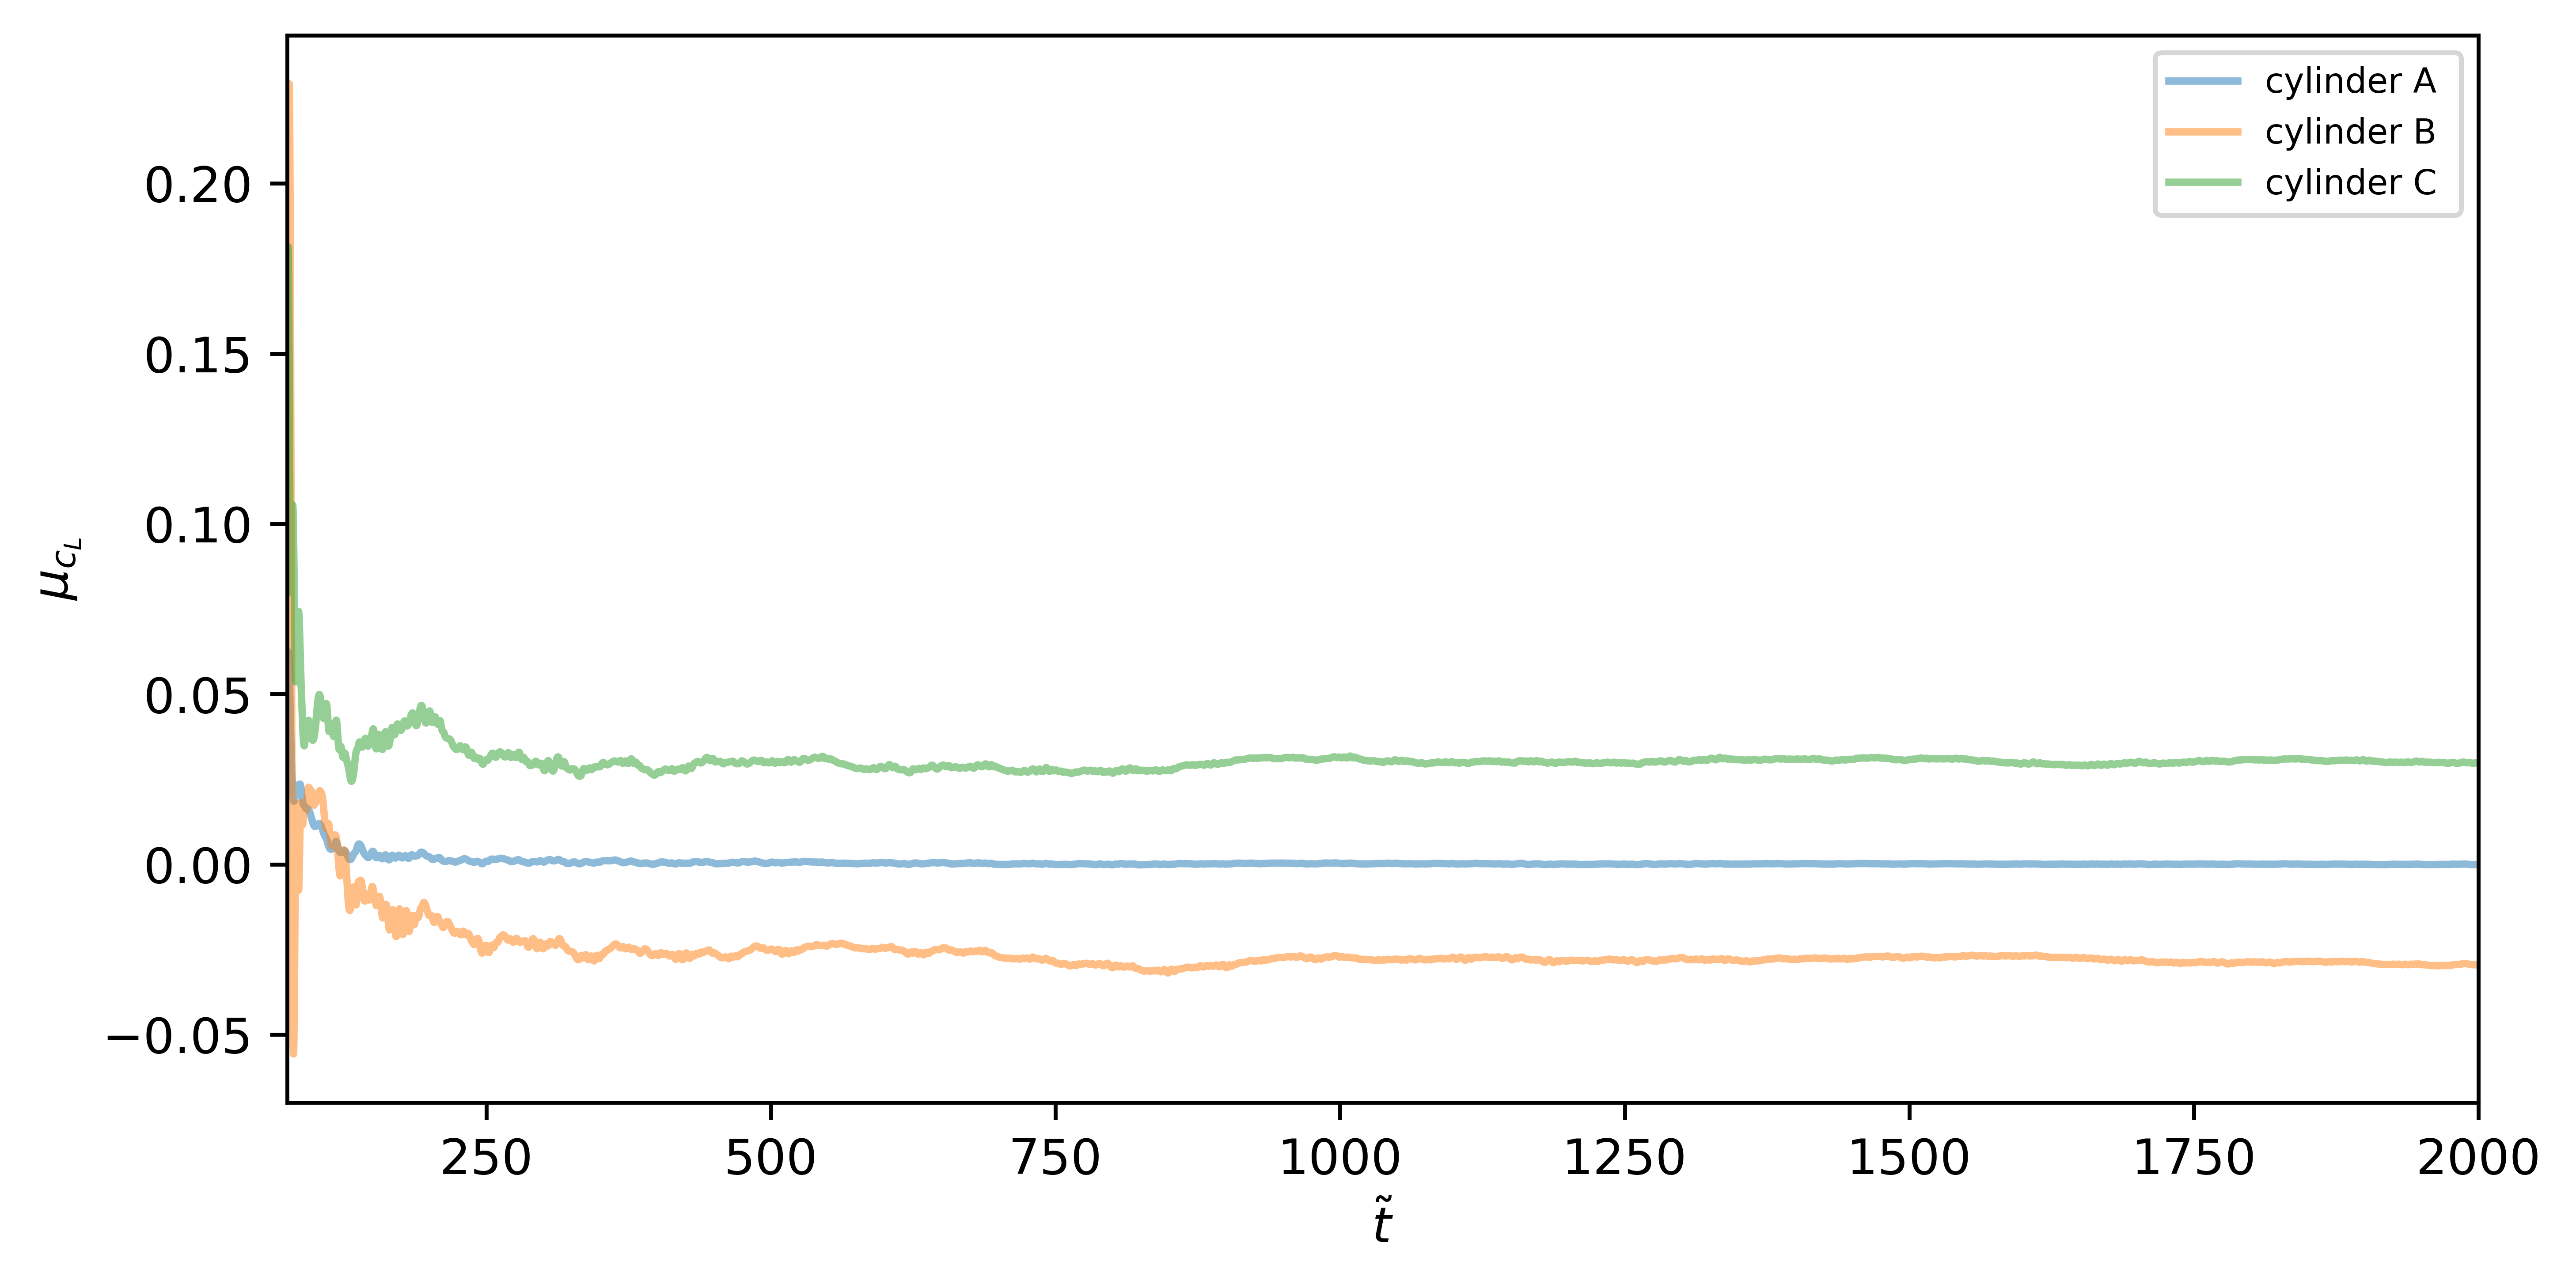

In [7]:
fig, ax1 = plt.subplots(1,1,figsize=(8,4))

ax1.set_ylabel(r"$\mu_{c_L}$", fontsize=font_size)
ax1.set_xlabel(r"$\tilde{t}$", fontsize=font_size)
ax1.tick_params(labelsize=font_size)
ax1.set_xlim(left=n, right=2000)
labels = ["cylinder A ", "cylinder B", "cylinder C"]

for i in range (len(means)):
    ax1.plot(t, means[i], label=labels[i], alpha=0.5)

ax1.legend()
fig.savefig(case+'_mean.png')

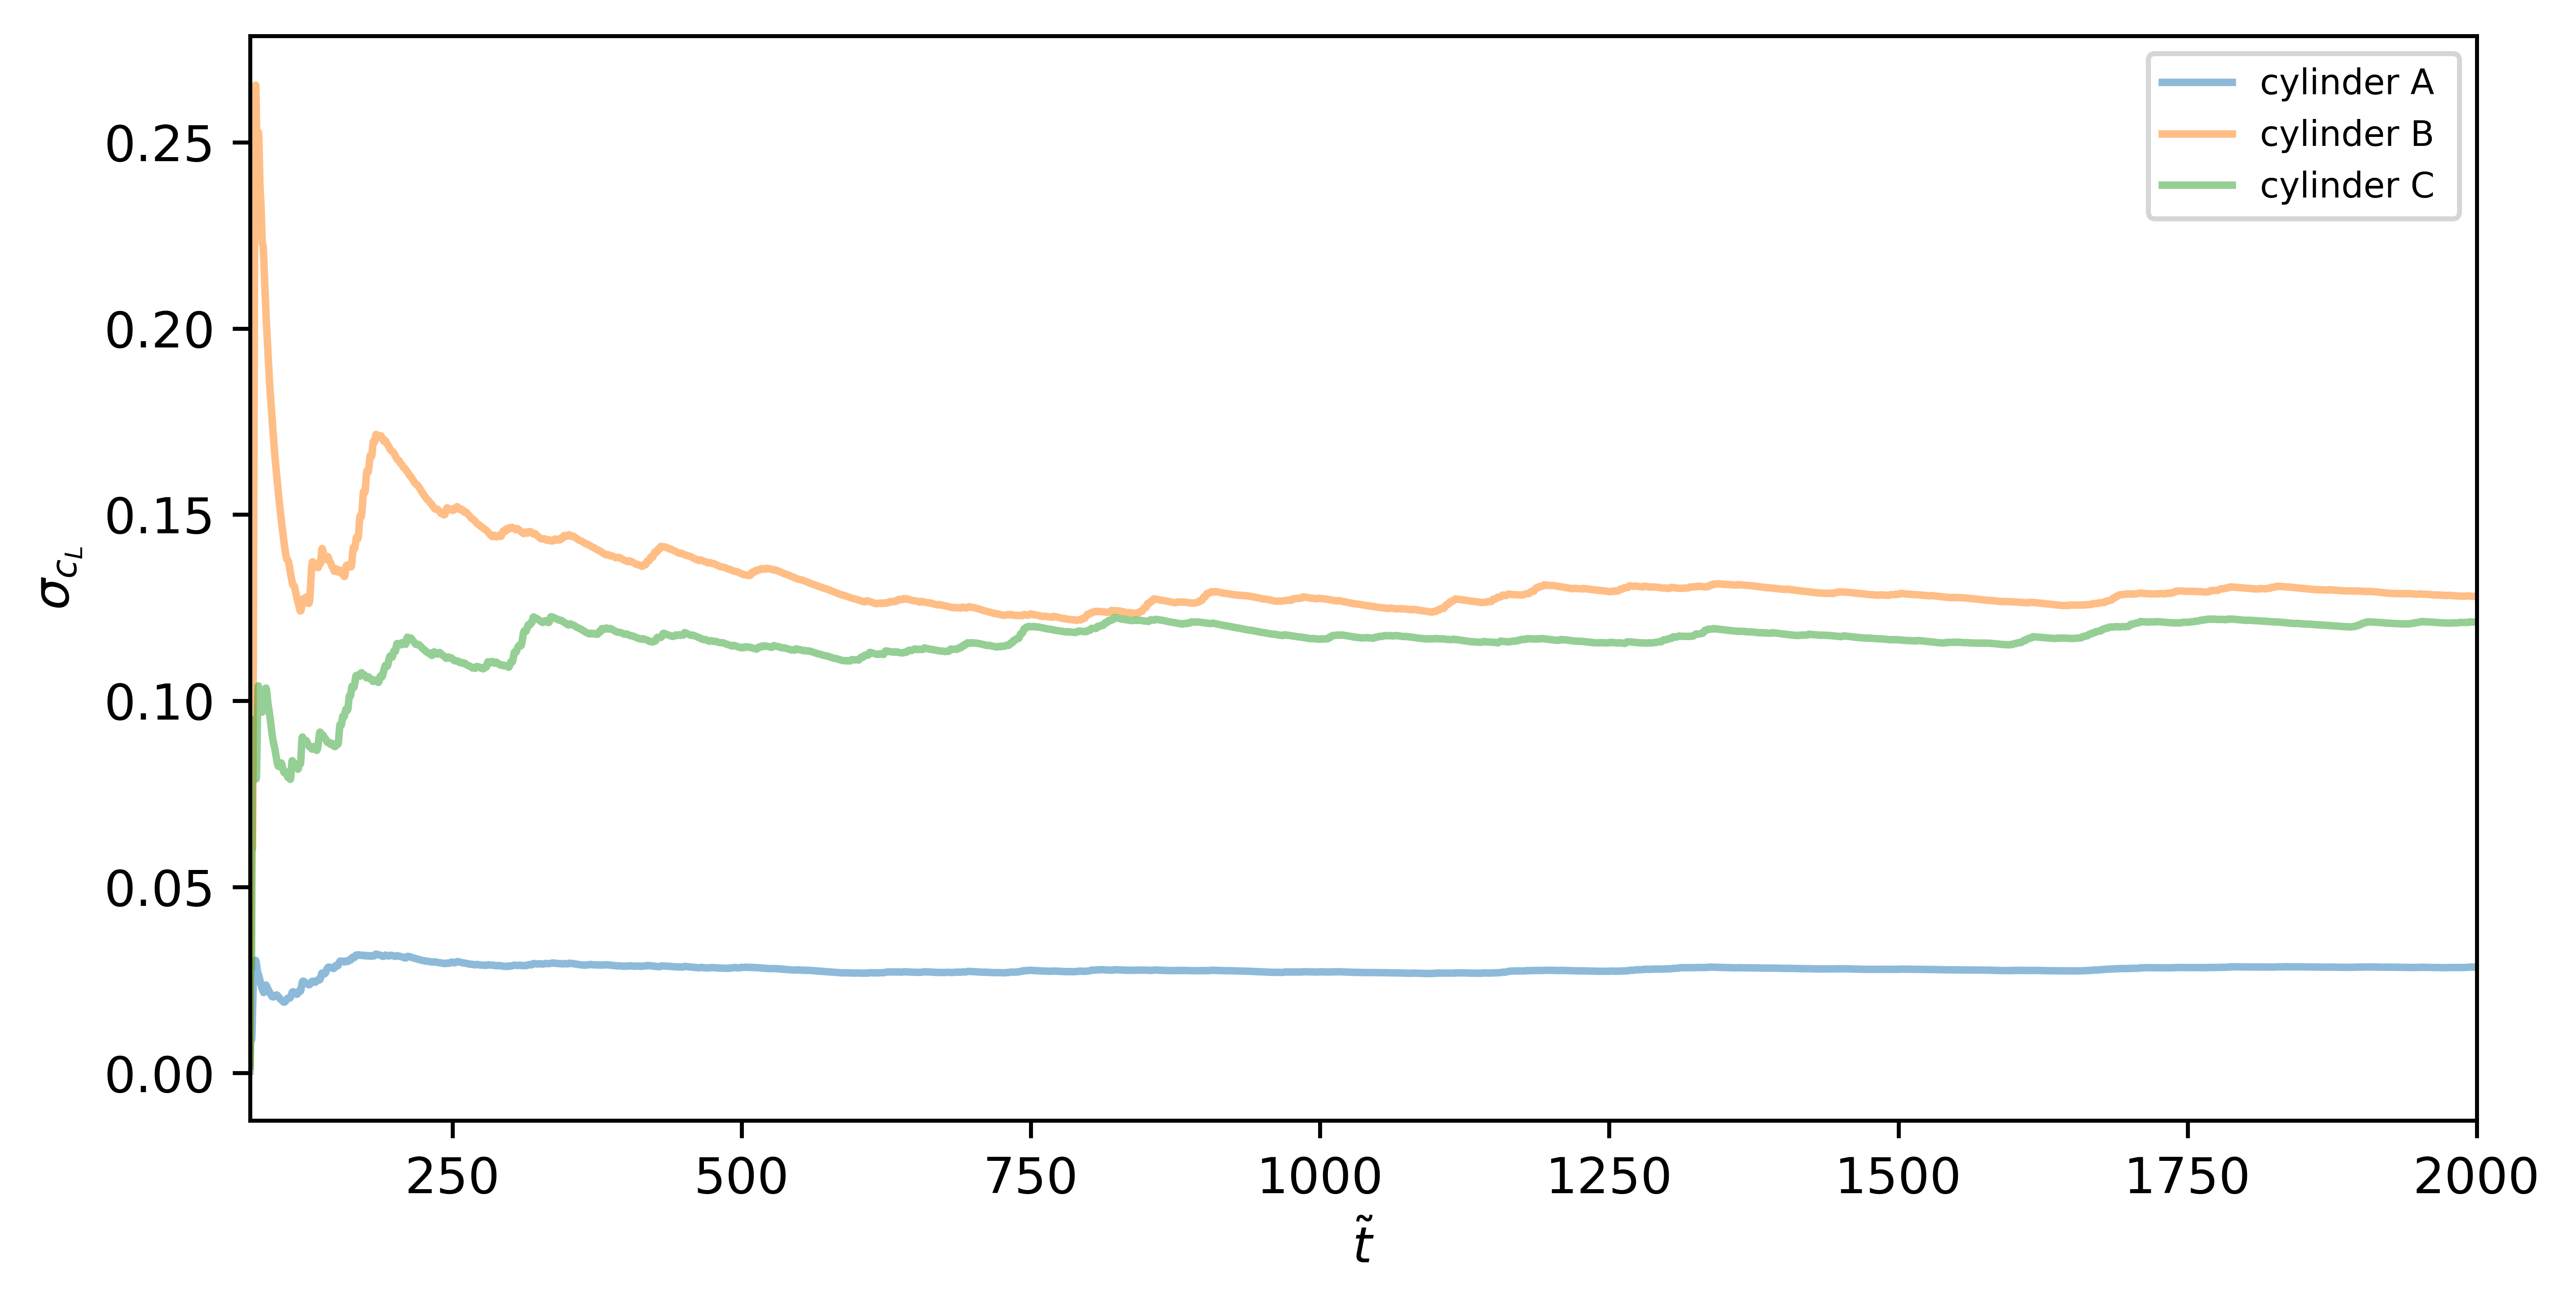

In [8]:
fig, ax1 = plt.subplots(1,1,figsize=(8,4))

ax1.set_ylabel(r"$\sigma_{c_L}$", fontsize=font_size)
ax1.set_xlabel(r"$\tilde{t}$", fontsize=font_size)
ax1.tick_params(labelsize=font_size)
ax1.set_xlim(left=n, right=2000)
labels = ["cylinder A ", "cylinder B", "cylinder C"]

for i in range (len(stds)):
    ax1.plot(t, stds[i], label=labels[i], alpha=0.5)

ax1.legend()
fig.savefig(case+'_std.png')